In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os

#os.chdir("..")
# Move train and test data into same folder as code

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print train.shape
print test.shape

(891, 12)
(418, 11)


In [4]:
print train.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print train.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


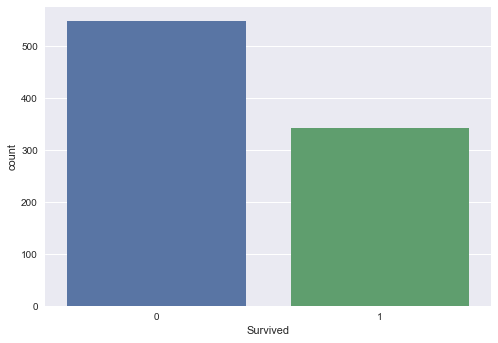

In [6]:
# Analyze Survived versus other features
sns.countplot(x = 'Survived', data = train)

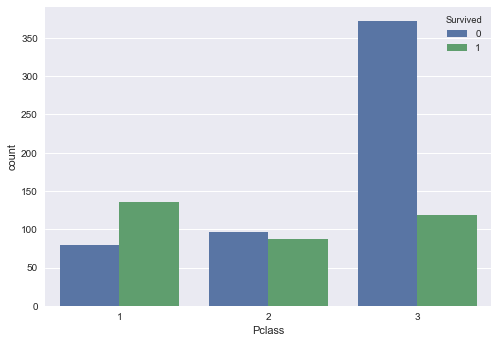

In [7]:
# Analyze relationship of survived and pclass
sns.countplot(x = 'Pclass', data = train, hue = 'Survived')

In [8]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

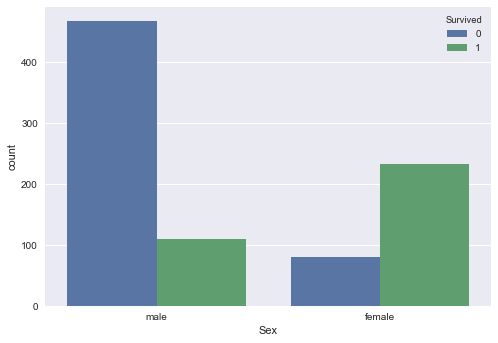

In [9]:
# Which gender has the best chance of surviving
sns.countplot(x = 'Sex', data = train, hue = 'Survived')

In [10]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [26]:
combineTrainTest = train.append(test)

In [27]:
# Extract title from name
combineTrainTest['Title'] = combineTrainTest['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0])

In [28]:
combineTrainTest['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Capt              1
 Lady              1
 the Countess      1
 Jonkheer          1
 Don               1
 Dona              1
 Mme               1
 Sir               1
Name: Title, dtype: int64

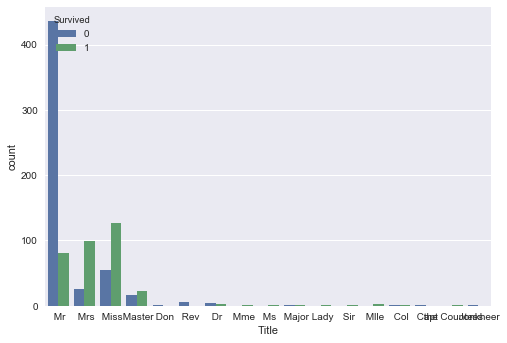

In [13]:
sns.countplot(x = 'Title', data = train, hue = 'Survived')

In [14]:
train['Survived'].groupby(train['Title']).mean()

Title
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

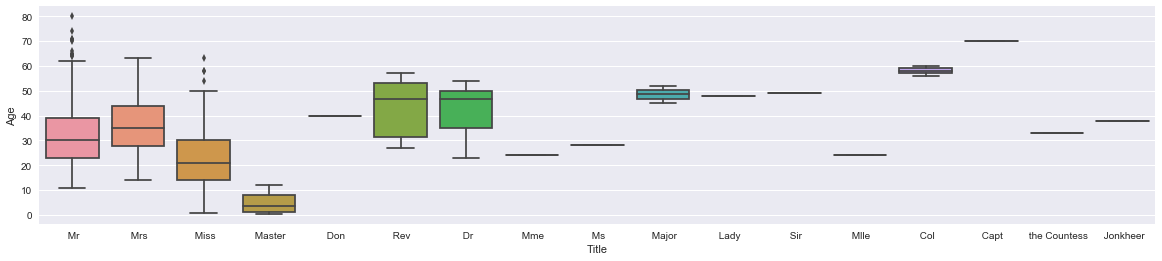

In [15]:
# Look at age range of each title
sns.set(rc={"figure.figsize": (20, 4)})
sns.boxplot(x = 'Title', y = 'Age', data = train)

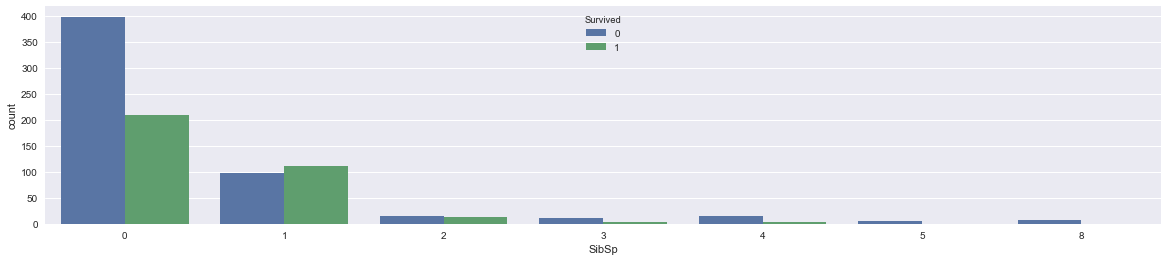

In [16]:
sns.countplot(x = 'SibSp', data = train, hue = 'Survived')

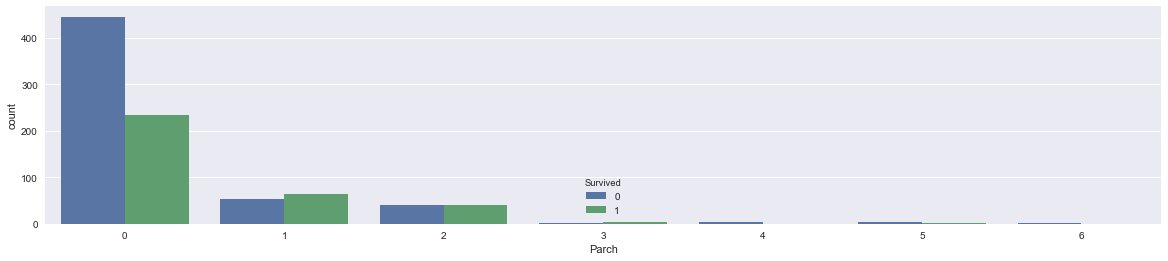

In [17]:
sns.countplot(x = 'Parch', data = train, hue = 'Survived')

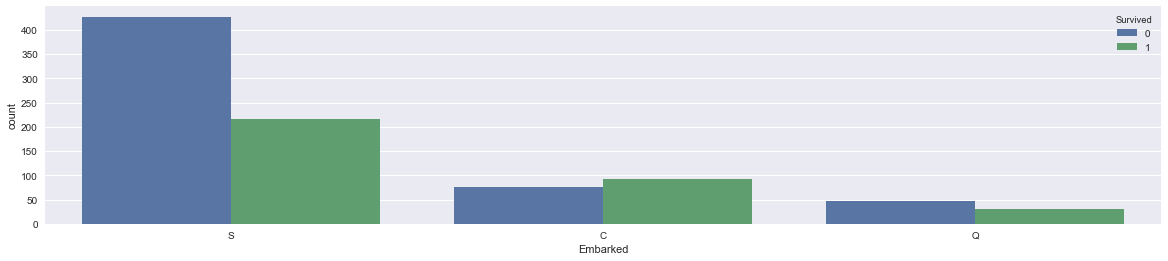

In [18]:
sns.countplot(x = 'Embarked', data = train, hue = 'Survived')

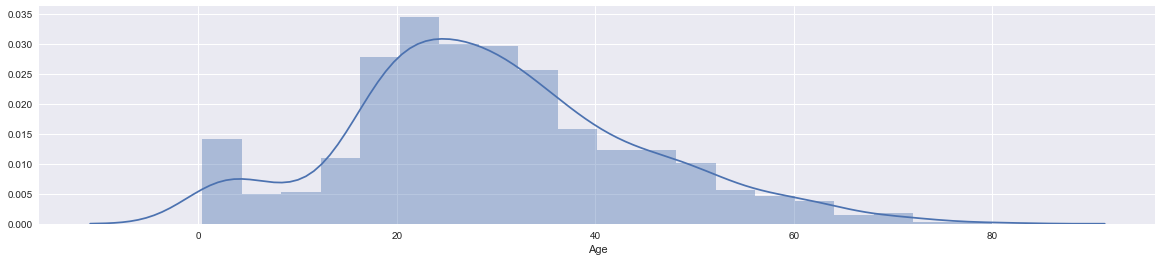

In [19]:
sns.distplot(train['Age'].dropna())

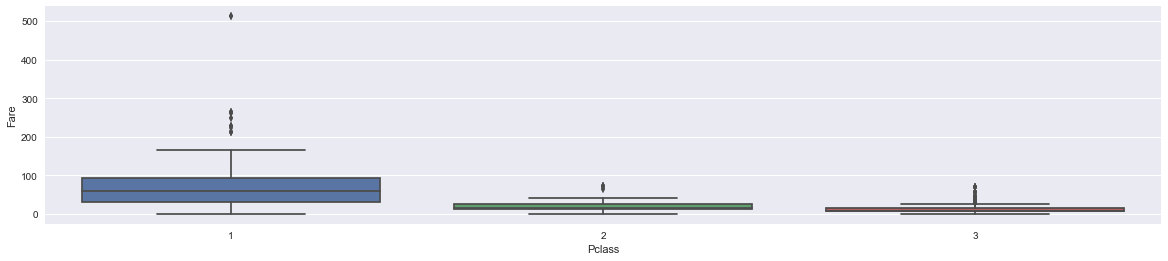

In [20]:
sns.boxplot(x = 'Pclass', y = 'Fare', data = train)

In [21]:
# Check for nulls in each columns
print train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


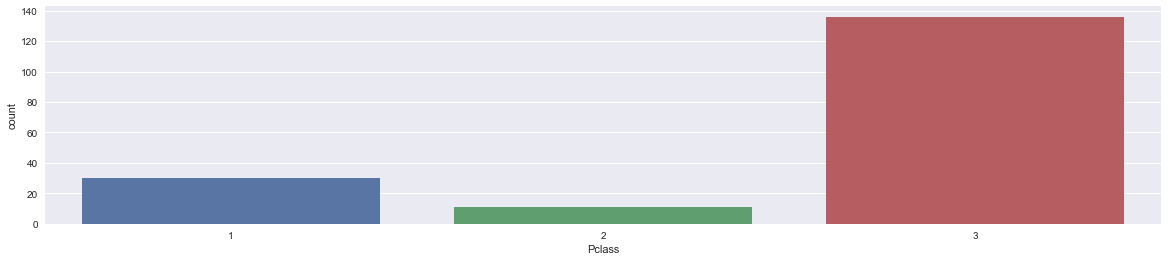

In [22]:
# Which class has most nulls
sns.countplot(x = 'Pclass', data = train[train['Age'].isnull()])

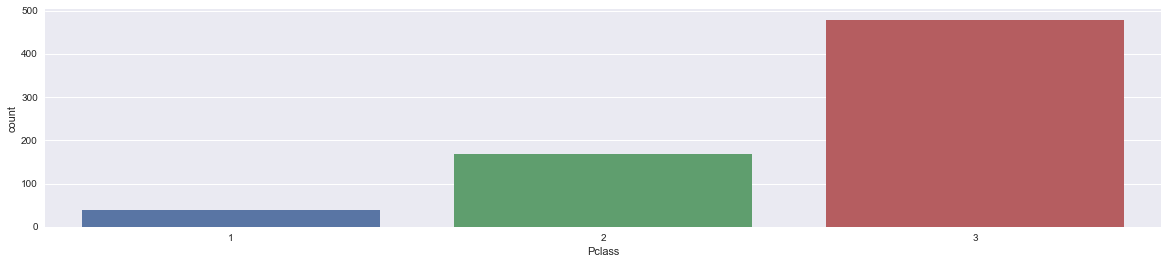

In [23]:
sns.countplot(x = 'Pclass', data = train[train['Cabin'].isnull()])

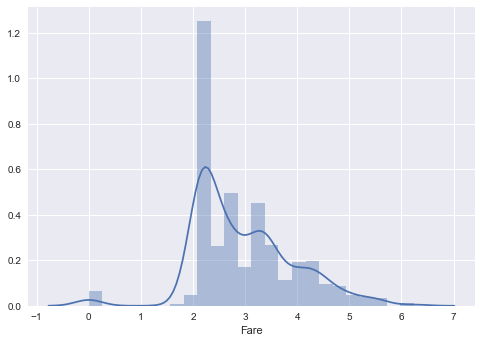

In [8]:
sns.distplot(np.log(train['Fare']+1))